# Proyecto 7: Dimensionalidad y Análisis Factorial
## Por Ricardo A. Del Río Guzmán

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importación de Librerías

In [0]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 2.0MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=282d2751a2ae866470fdbc9c6acc622e2289dab585837aadd55d004086d64fde
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [0]:
import datetime
from os import getcwd, chdir, listdir
from scipy.stats import trim_mean as tm
from scipy.stats import bartlett

# Estruturas de datos:
import pandas as pd
import numpy as np

# Visuaizaciones:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos:
import statsmodels.formula.api as smf
import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity, 
                                             calculate_kmo)

# Librerías propias:
#chdir('/content/drive/My Drive/__libreras_propias')
#%run info_tables.ipynb
#chdir('/content/drive/My Drive/Proyecto 07')

## Definiciones de Clases, Funciones y Variables

### Funciones para Creación de Gráficos

In [0]:
def save_graph(name):
  org_dir = getcwd()
  chdir('/content/drive/My Drive/Proyecto 06/Imágenes')
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")
  chdir(org_dir)

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')

def correlation_map(dataframe, titulo, annot=True):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor 
  # corr_pd = corr_pd[abs(corr_pd) >= 0.05]
  corr_pd = corr_pd[abs(corr_pd) >= 0.3]

  plt.figure(figsize=(15, 6))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=annot, mask=mask, cmap='RdBu_r', center=0) 
  plt.title(titulo, fontsize=20)
  # save_graph(modify_text(titulo))
  plt.show()
  print()

def boxplot_graph(column, name, sec=False):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  if sec:
    # save_graph(modify_text('Boxplot limpio de Columna ' + name))
    pass
  else:
    # save_graph(modify_text('Boxplot de Columna ' + name))
    pass
  plt.show()


def null_graph(db, name):
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(name), fontsize=20)
  # save_graph(modify_text('Valores Nulos en "{}"'.format(credit.name)))
  plt.show()
  display(db.info())
  print()

def outliers_graph(column, col_name, sec = False):
  # Cut the window in 2 parts
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  plt.title('Outliers de "{}"'.format(col_name.replace('_',' ').title()))
  
  # Add a graph in each part
  sns.boxplot(column, ax=ax_box)
  sns.distplot(column, ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

 ## if sec:
 ##   save_graph(modify_text('Sin Outliers de "{}"'.format(col_name.replace('_',' ').title())))
 ## elif not sec:
 ##   save_graph(modify_text('Outliers de "{}"'.format(col_name.replace('_',' ').title())))
  
  plt.show()
  print()

### Funciones para Modificación de Texto

In [0]:
def char(c):
  '''
  Cambia los carácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]

def pretty(txt):
  '''
  Toma un texto en "snake_case" y lo transforma a "Title Case"
  '''
  return txt.replace('_',' ').title()

## Formatos y Configuraciones

In [0]:
# Carga una versión anterior de matplotlib, para que los gráficos heatmaps no
# se corten en la base:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 2.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


In [0]:
# Formato de los gráficos:
sns.set(style='whitegrid')

## Carga de Datos

In [0]:
col_info = {
  'EXT1':	'I am the life of the party.',
  'EXT2':	'I don\'t talk a lot.',
  'EXT3':	'I feel comfortable around people.',
  'EXT4':	'I keep in the background.',
  'EXT5':	'I start conversations.',
  'EXT6':	'I have little to say.',
  'EXT7':	'I talk to a lot of different people at parties.',
  'EXT8':	'I don\'t like to draw attention to myself.',
  'EXT9':	'I don\'t mind being the center of attention.',
  'EXT10':	'I am quiet around strangers.',

  'EST1':	'I get stressed out easily.',
  'EST2':	'I am relaxed most of the time.',
  'EST3':	'I worry about things.',
  'EST4':	'I seldom feel blue.',
  'EST5':	'I am easily disturbed.',
  'EST6':	'I get upset easily.',
  'EST7':	'I change my mood a lot.',
  'EST8':	'I have frequent mood swings.',
  'EST9':	'I get irritated easily.',
  'EST10':	'I often feel blue.',

  'AGR1':	'I feel little concern for others.',
  'AGR2':	'I am interested in people.',
  'AGR3':	'I insult people.',
  'AGR4':	'I sympathize with others\' feelings.',
  'AGR5':	'I am not interested in other people\'s problems.',
  'AGR6':	'I have a soft heart.',
  'AGR7':	'I am not really interested in others.',
  'AGR8':	'I take time out for others.',
  'AGR9':	'I feel others\' emotions.',
  'AGR10':	'I make people feel at ease.',

  'CSN1':	'I am always prepared.',
  'CSN2':	'I leave my belongings around.',
  'CSN3':	'I pay attention to details.',
  'CSN4':	'I make a mess of things.',
  'CSN5':	'I get chores done right away.',
  'CSN6':	'I often forget to put things back in their proper place.',
  'CSN7':	'I like order.',
  'CSN8':	'I shirk my duties.',
  'CSN9':	'I follow a schedule.',
  'CSN10':	'I am exacting in my work.',

  'OPN1':	'I have a rich vocabulary.',
  'OPN2':	'I have difficulty understanding abstract ideas.',
  'OPN3':	'I have a vivid imagination.',
  'OPN4':	'I am not interested in abstract ideas.',
  'OPN5':	'I have excellent ideas.',
  'OPN6':	'I do not have a good imagination.',
  'OPN7':	'I am quick to understand things.',
  'OPN8':	'I use difficult words.',
  'OPN9':	'I spend time reflecting on things.',
  'OPN10':	'I am full of ideas.',
}

In [0]:
_test = pd.read_csv('/content/drive/My Drive/Proyecto 07/test_25000.csv')
##_test = pd.read_csv('/content/drive/My Drive/test_25000.csv')
print(_test.columns)
display(_test.head(3))
print(_test.shape)

Index(['Unnamed: 0', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'EXT8', 'EXT9',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=111)


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,355992,4.0,4.0,5.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,3.0,...,5186.0,7763.0,9496.0,3648.0,3685.0,1271.0,3134.0,10108.0,4436.0,6036.0,7189.0,3873.0,5720.0,23645.0,3385.0,10124.0,3138.0,3169.0,2631.0,4134.0,9839.0,9659.0,8626.0,8241.0,3882.0,3482.0,915.0,7191.0,4831.0,3256.0,2017-02-26 04:35:54,320.0,568.0,44.0,317.0,14,1,US,35.0527,-78.8784
1,729472,3.0,2.0,5.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0,4.0,1.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,2.0,...,3599.0,1840.0,2464.0,1616.0,2088.0,2832.0,2168.0,2456.0,5071.0,2016.0,1664.0,2008.0,2346.0,3088.0,3056.0,3480.0,2256.0,8248.0,1561.0,6527.0,2944.0,1936.0,5512.0,1704.0,992.0,4720.0,5672.0,704.0,744.0,808.0,2018-05-03 05:59:42,1600.0,900.0,6.0,161.0,6,2,GB,51.272,0.5746
2,251646,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,1.0,1.0,5.0,3.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,3.0,5.0,2.0,4.0,1.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,...,4302.0,1796.0,1862.0,2640.0,5169.0,5255.0,4939.0,2417.0,2378.0,4177.0,3690.0,2642.0,3312.0,1945.0,4060.0,12921.0,3306.0,7281.0,4225.0,3273.0,3107.0,3615.0,2890.0,4142.0,5554.0,4058.0,7034.0,2744.0,3123.0,4708.0,2016-10-27 16:45:31,1600.0,900.0,9.0,185.0,22,5,US,39.4561,-98.1062


(25000, 111)


In [0]:
# # Se define la ubicación donde se guardarán los datos de las columnas y 
# # categorías:
# DataBaseTable.set_dir('/content/drive/My Drive/Proyecto 07')

# # Se carga la información de las columnas y categorías de cada tabla:
# credit = DataBaseTable('Test', '/content/drive/My Drive/Proyecto 07/test_25000.csv')

## Análisis Exploratorio

1. Luego de cargar la data y analizar sus valores, identifique la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas. Sumado a lo anterior, identifique y establezca un protocolo para tratar outliers.

2. Genere un nuevo Dataframe que excluya datos nulos y outliers en función a lo indicado en el paso anterior. A partir del mismo, genere un análisis exploratorio basándose en variables de su interés. 

3. Reporte las medias de cada una de las preguntas del test. (Hint: Puede utilizar dotplot para ello). Junto a ello, implemente un análisis de correlaciones lineales y analice detalladamente. 

¿Qué comportamientos podemos observar en ambos gráficos? Comente los principales hallazgos.

### Análisis de Nulos




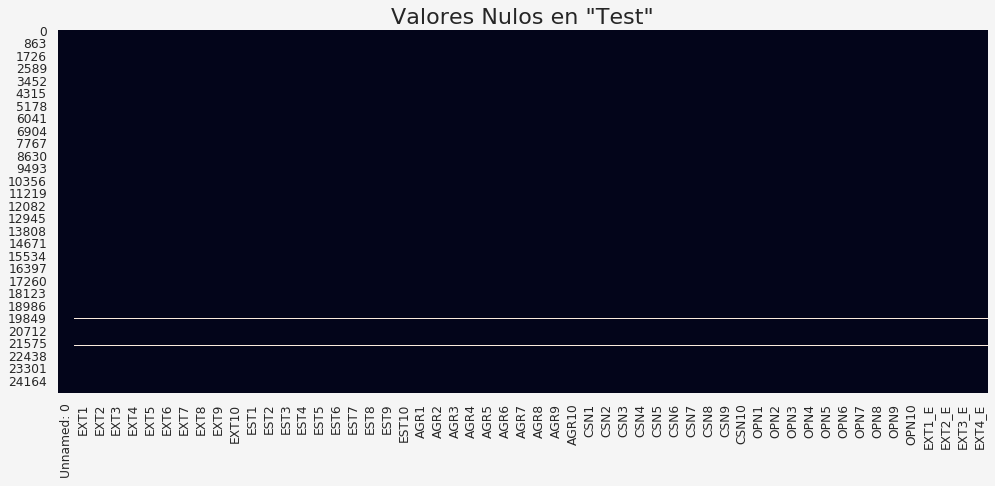

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 55 columns):
Unnamed: 0    25000 non-null int64
EXT1          24950 non-null float64
EXT2          24950 non-null float64
EXT3          24950 non-null float64
EXT4          24950 non-null float64
EXT5          24950 non-null float64
EXT6          24950 non-null float64
EXT7          24950 non-null float64
EXT8          24950 non-null float64
EXT9          24950 non-null float64
EXT10         24950 non-null float64
EST1          24950 non-null float64
EST2          24950 non-null float64
EST3          24950 non-null float64
EST4          24950 non-null float64
EST5          24950 non-null float64
EST6          24950 non-null float64
EST7          24950 non-null float64
EST8          24950 non-null float64
EST9          24950 non-null float64
EST10         24950 non-null float64
AGR1          24950 non-null float64
AGR2          24950 non-null float64
AGR3          24950 non-null float64
AGR4 

None

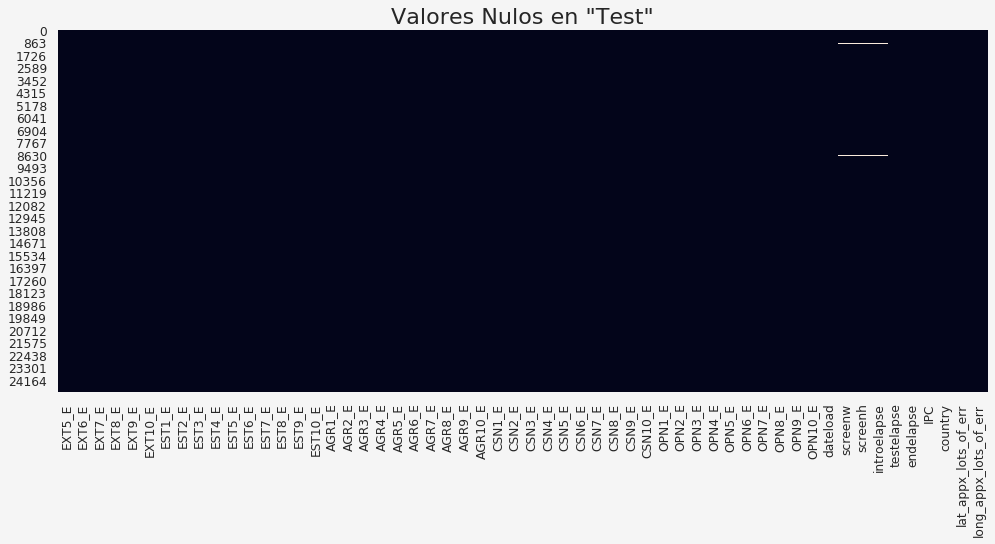

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 56 columns):
EXT5_E                   24950 non-null float64
EXT6_E                   24950 non-null float64
EXT7_E                   24950 non-null float64
EXT8_E                   24950 non-null float64
EXT9_E                   24950 non-null float64
EXT10_E                  24950 non-null float64
EST1_E                   24950 non-null float64
EST2_E                   24950 non-null float64
EST3_E                   24950 non-null float64
EST4_E                   24950 non-null float64
EST5_E                   24950 non-null float64
EST6_E                   24950 non-null float64
EST7_E                   24950 non-null float64
EST8_E                   24950 non-null float64
EST9_E                   24950 non-null float64
EST10_E                  24950 non-null float64
AGR1_E                   24950 non-null float64
AGR2_E                   24950 non-null float64
AGR3_E                   24

None

In [0]:
# Se grafican y tabulan los nulos:
null_graph(_test.iloc[:,:55], 'Test')
null_graph(_test.iloc[:,55:], 'Test')

In [0]:
_test.dropna(axis='index', inplace=True)
_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24915 entries, 0 to 24999
Columns: 111 entries, Unnamed: 0 to long_appx_lots_of_err
dtypes: float64(104), int64(3), object(4)
memory usage: 21.3+ MB


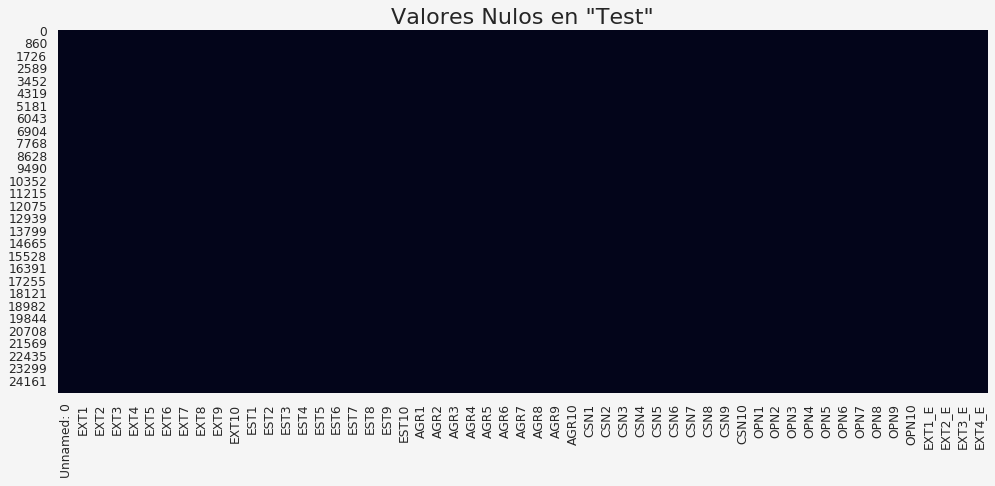

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24915 entries, 0 to 24999
Data columns (total 55 columns):
Unnamed: 0    24915 non-null int64
EXT1          24915 non-null float64
EXT2          24915 non-null float64
EXT3          24915 non-null float64
EXT4          24915 non-null float64
EXT5          24915 non-null float64
EXT6          24915 non-null float64
EXT7          24915 non-null float64
EXT8          24915 non-null float64
EXT9          24915 non-null float64
EXT10         24915 non-null float64
EST1          24915 non-null float64
EST2          24915 non-null float64
EST3          24915 non-null float64
EST4          24915 non-null float64
EST5          24915 non-null float64
EST6          24915 non-null float64
EST7          24915 non-null float64
EST8          24915 non-null float64
EST9          24915 non-null float64
EST10         24915 non-null float64
AGR1          24915 non-null float64
AGR2          24915 non-null float64
AGR3          24915 non-null float64
AGR4 

None

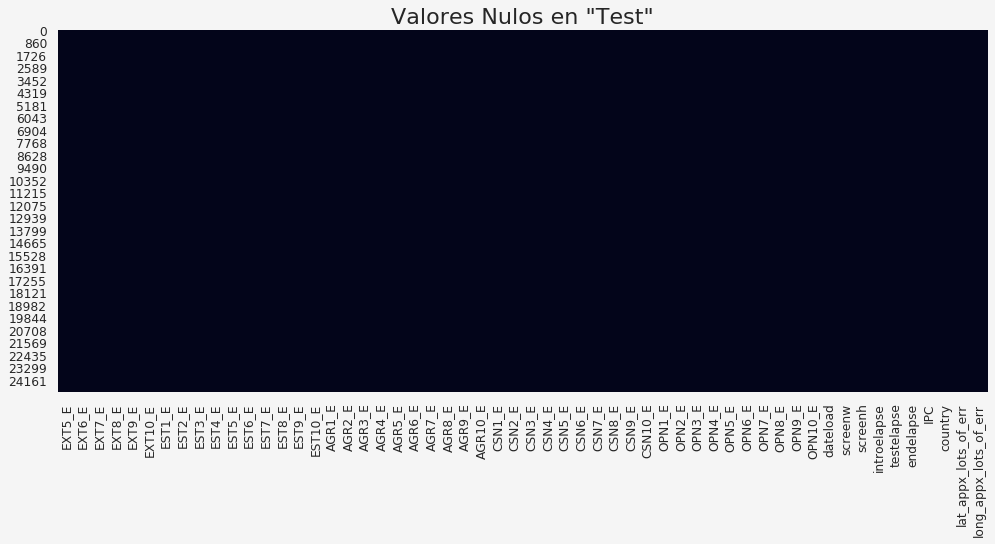

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24915 entries, 0 to 24999
Data columns (total 56 columns):
EXT5_E                   24915 non-null float64
EXT6_E                   24915 non-null float64
EXT7_E                   24915 non-null float64
EXT8_E                   24915 non-null float64
EXT9_E                   24915 non-null float64
EXT10_E                  24915 non-null float64
EST1_E                   24915 non-null float64
EST2_E                   24915 non-null float64
EST3_E                   24915 non-null float64
EST4_E                   24915 non-null float64
EST5_E                   24915 non-null float64
EST6_E                   24915 non-null float64
EST7_E                   24915 non-null float64
EST8_E                   24915 non-null float64
EST9_E                   24915 non-null float64
EST10_E                  24915 non-null float64
AGR1_E                   24915 non-null float64
AGR2_E                   24915 non-null float64
AGR3_E                   24

None

In [0]:
# Se grafican y tabulan los nulos:
null_graph(_test.iloc[:,:55], 'Test')
null_graph(_test.iloc[:,55:], 'Test')


### Análisis de Outliers

In [0]:
# Se revisan los outliers en las columnas con las respuestas al test:
_test.loc[:,:'OPN10'].describe()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2.491500e+04,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.00000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000
mean,5.052199e+05,2.638772,2.793779,3.284327,3.158419,3.260405,2.403893,2.752960,3.424885,2.954686,3.572346,3.279711,3.164359,3.834437,2.653341,2.850732,2.827975,3.037929,2.678106,3.07935,2.776279,2.256151,3.829460,2.257074,3.929761,2.272968,3.735501,2.200763,3.679591,3.793016,3.594140,3.302629,2.934417,3.970259,2.617700,2.617901,2.832832,3.692956,2.466346,3.202729,3.588922,3.657074,2.068513,3.996428,2.002328,3.791652,1.886936,3.979410,3.184066,4.113386,3.954485
std,2.940595e+05,1.267836,1.324588,1.218153,1.239578,1.273798,1.226180,1.402965,1.267823,1.347978,1.298976,1.344189,1.233870,1.174200,1.254436,1.270728,1.322864,1.290121,1.337644,1.29687,1.327895,1.337897,1.138241,1.278138,1.121128,1.168279,1.226545,1.118631,1.101845,1.165339,1.081119,1.179829,1.398471,1.049566,1.252141,1.276126,1.416776,1.132775,1.142291,1.280406,1.057315,1.154655,1.108870,1.100670,1.095721,0.987102,1.098878,1.009636,1.255347,1.051127,1.034416
min,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.480200e+05,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000
50%,5.044370e+05,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,7.608690e+05,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,1.015322e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,

In [0]:
# Se calcula la cantidad de ceros de las columnas:
count = 0
suma = 0
for col in _test.loc[:,:'OPN10'].columns:
  # print(_test[col][_test[col] == 0].count())
  count += 1
  suma += _test[col][_test[col] == 0].count()

print('promedio de cantidad de ceros por columna: ', suma/count)

promedio de cantidad de ceros por columna:  181.0392156862745


In [0]:
# Se reemplazan los ceros con un número elegido al azar etre las categorías,
# con una probabilidad proporcional a la cantidad de datos de las categorías en
# la columna.

'''
from random import randint as r

for col_name in _test.loc[:, 'EXT1':'OPN10'].columns.values:
  dic = {}
  cum_sum = 0
  for i in range(1,6):
    cum_sum += _test[col][_test[col] == i].count()
    dic[i] = [_test[col][_test[col] == i].count(), cum_sum]
  total = cum_sum

  # print(dic)
  
  count = 0
  stop = False
  for value in _test[col_name].values:
    if not (value in range(1,6)):
      print(f'entró con el valor {value}')
      random_num = r(1,total+2)
      for i in range(1,6):
        if random_num <= dic[i][1] and not stop:
          # print('entro2')
          new_value = i
          stop = True
      print(f'columna {col_name}, fila {count}')
      print('valor antiguo ', _test.loc[:,col_name][count])
      print(f'debería cambiarse por {new_value}')
      _test.loc[:,col_name][count] = new_value
      print('valor nuevo ', _test.loc[:,col_name][count], '\n\n')
    count += 1
    
'''

"\nfrom random import randint as r\n\nfor col_name in _test.loc[:, 'EXT1':'OPN10'].columns.values:\n  dic = {}\n  cum_sum = 0\n  for i in range(1,6):\n    cum_sum += _test[col][_test[col] == i].count()\n    dic[i] = [_test[col][_test[col] == i].count(), cum_sum]\n  total = cum_sum\n\n  # print(dic)\n  \n  count = 0\n  stop = False\n  for value in _test[col_name].values:\n    if not (value in range(1,6)):\n      print(f'entró con el valor {value}')\n      random_num = r(1,total+2)\n      for i in range(1,6):\n        if random_num <= dic[i][1] and not stop:\n          # print('entro2')\n          new_value = i\n          stop = True\n      print(f'columna {col_name}, fila {count}')\n      print('valor antiguo ', _test.loc[:,col_name][count])\n      print(f'debería cambiarse por {new_value}')\n      _test.loc[:,col_name][count] = new_value\n      print('valor nuevo ', _test.loc[:,col_name][count], '\n\n')\n    count += 1\n    \n"

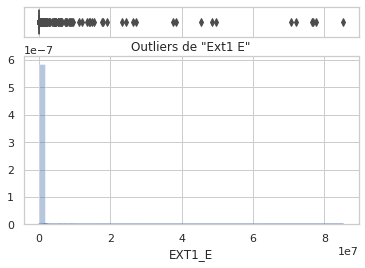

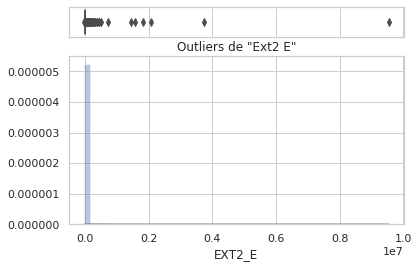

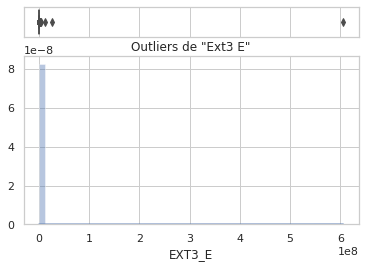

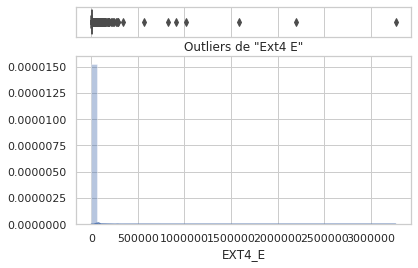

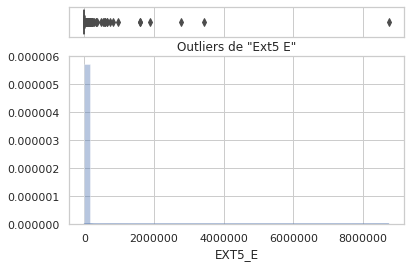

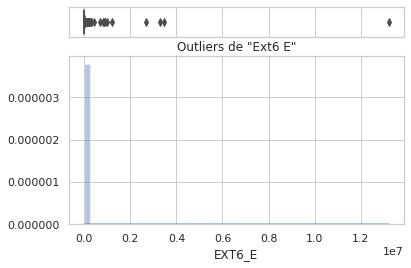

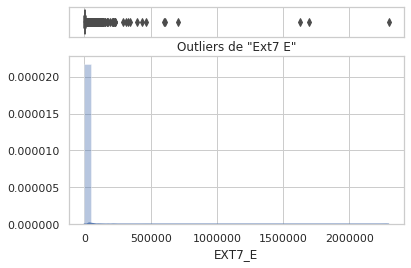

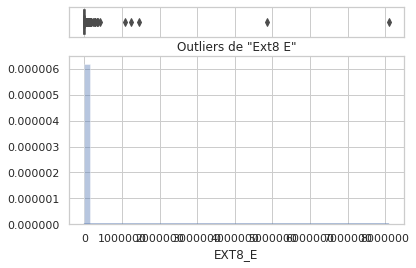

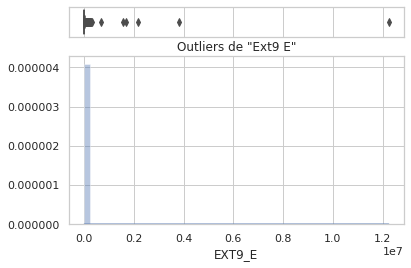

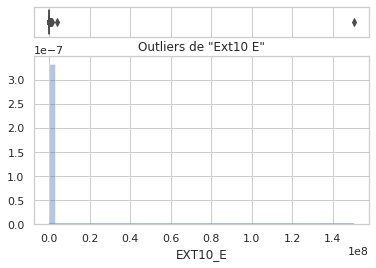

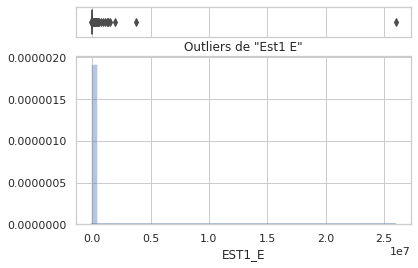

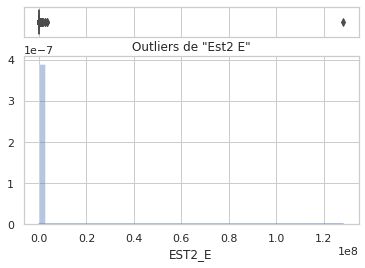

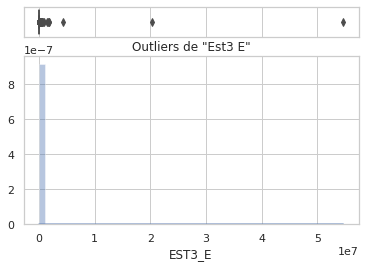

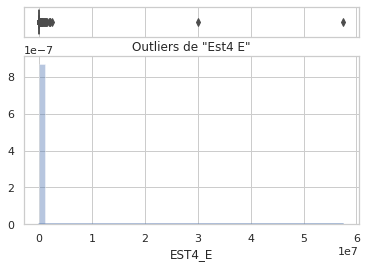

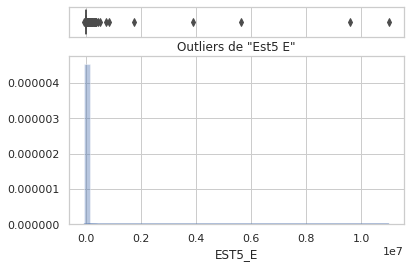

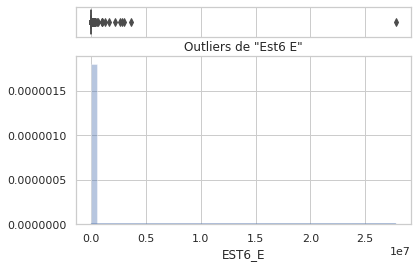

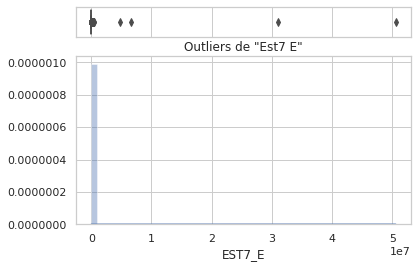

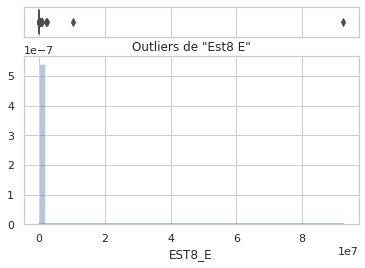

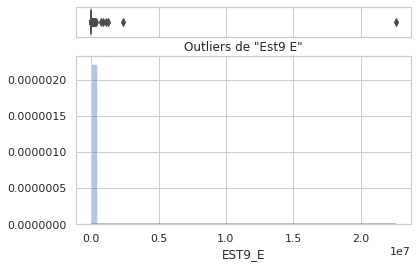

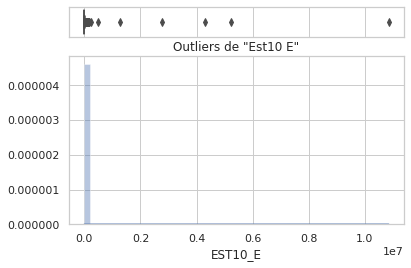

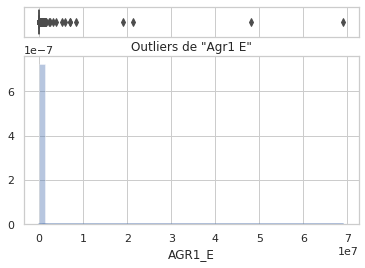

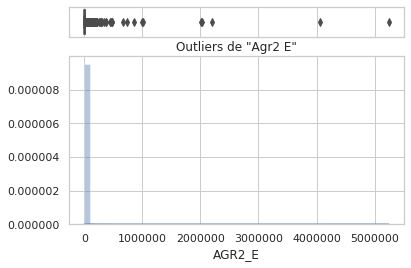

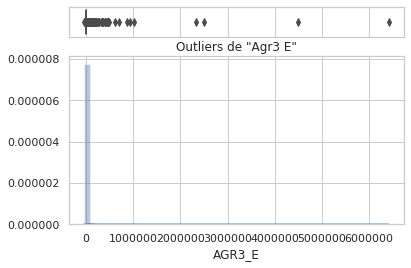

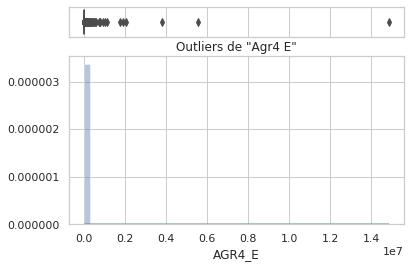

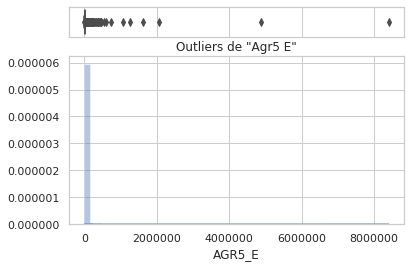

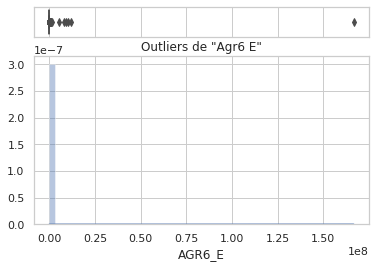

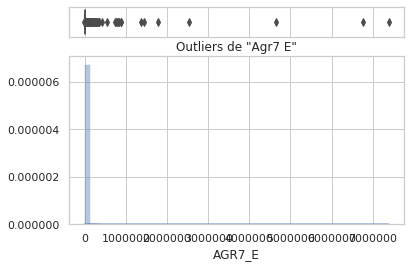

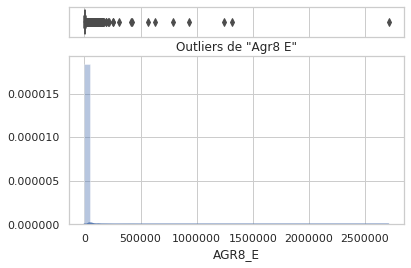

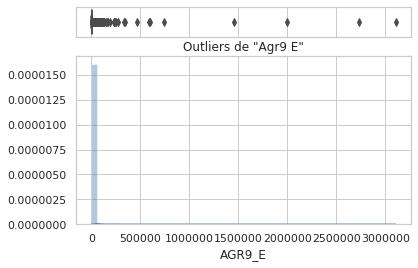

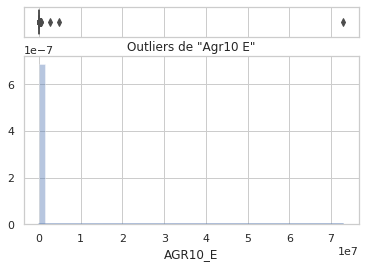

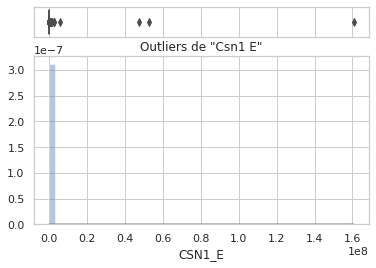

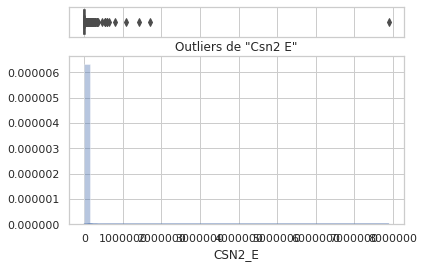

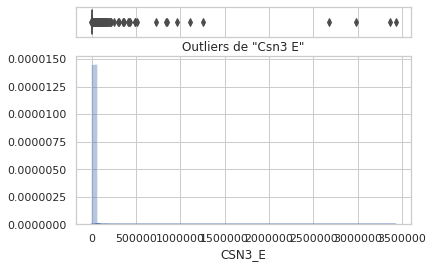

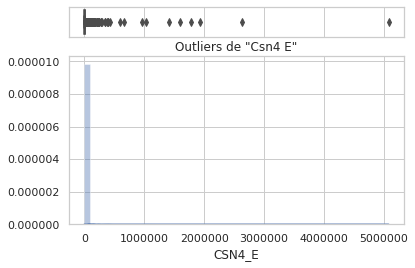

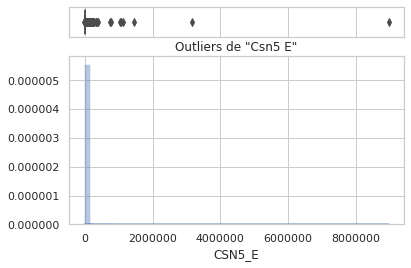

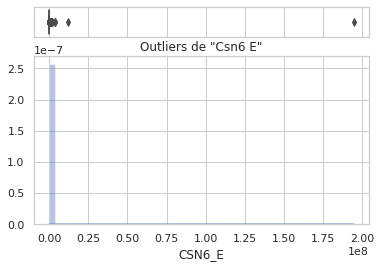

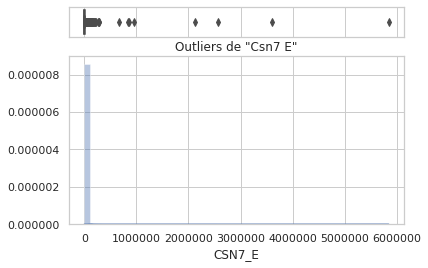

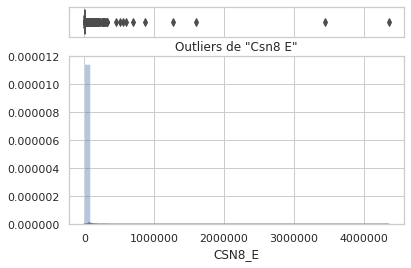

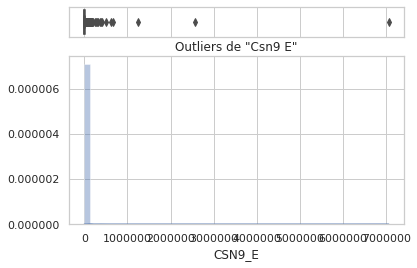

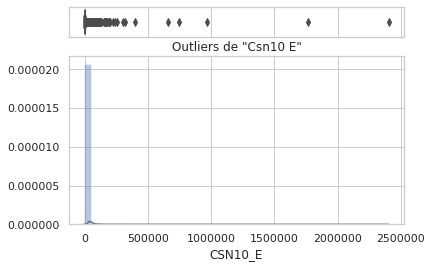

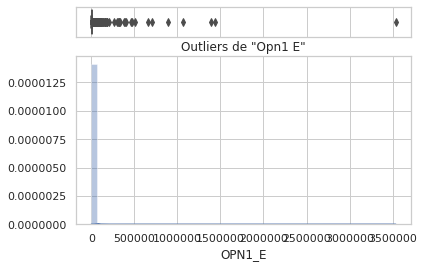

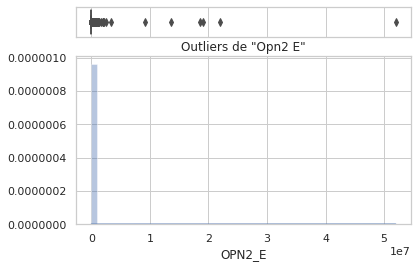

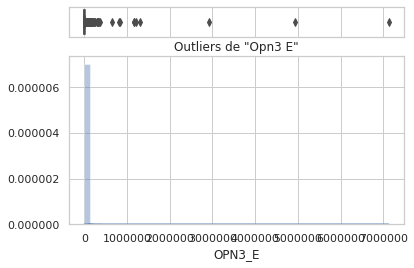

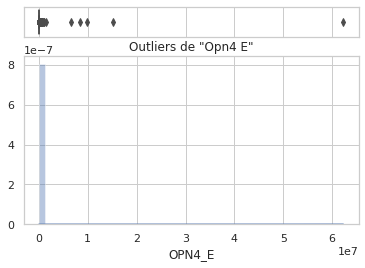

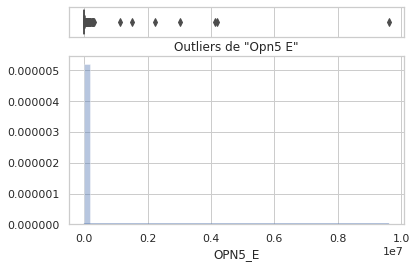

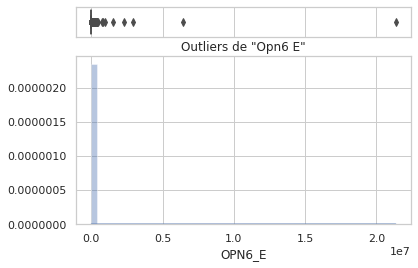

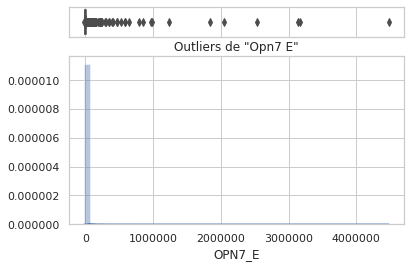

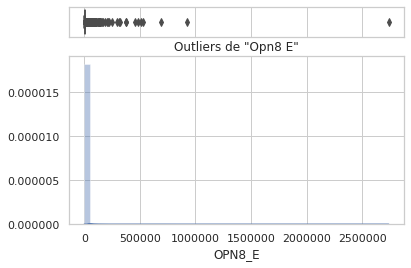

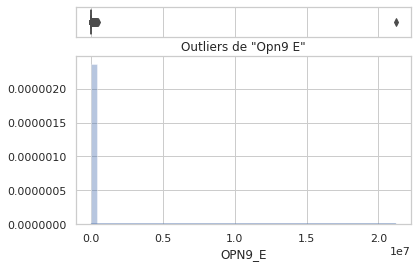

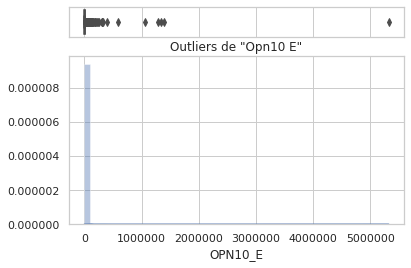

In [0]:
for col_name in _test.loc[:,'EXT1_E':'OPN10_E']:
  outliers_graph(_test[col_name], col_name)

### Análisis de Otros Parámetros

In [0]:
analisis(_test, 'Test')

La base de datos "Test" tiene 24915 filas y 111 columnas.



,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,355992,4.0,4.0,5.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,3.0,...,5186.0,7763.0,9496.0,3648.0,3685.0,1271.0,3134.0,10108.0,4436.0,6036.0,7189.0,3873.0,5720.0,23645.0,3385.0,10124.0,3138.0,3169.0,2631.0,4134.0,9839.0,9659.0,8626.0,8241.0,3882.0,3482.0,915.0,7191.0,4831.0,3256.0,2017-02-26 04:35:54,320.0,568.0,44.0,317.0,14,1,US,35.0527,-78.8784
1,729472,3.0,2.0,5.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,1.0,0.0,4.0,4.0,1.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,2.0,...,3599.0,1840.0,2464.0,1616.0,2088.0,2832.0,2168.0,2456.0,5071.0,2016.0,1664.0,2008.0,2346.0,3088.0,3056.0,3480.0,2256.0,8248.0,1561.0,6527.0,2944.0,1936.0,5512.0,1704.0,992.0,4720.0,5672.0,704.0,744.0,808.0,2018-05-03 05:59:42,1600.0,900.0,6.0,161.0,6,2,GB,51.272,0.5746
2,251646,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,1.0,1.0,5.0,3.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,3.0,5.0,2.0,4.0,1.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,...,4302.0,1796.0,1862.0,2640.0,5169.0,5255.0,4939.0,2417.0,2378.0,4177.0,3690.0,2642.0,3312.0,1945.0,4060.0,12921.0,3306.0,7281.0,4225.0,3273.0,3107.0,3615.0,2890.0,4142.0,5554.0,4058.0,7034.0,2744.0,3123.0,4708.0,2016-10-27 16:45:31,1600.0,900.0,9.0,185.0,22,5,US,39.4561,-98.1062


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,...,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,2.491500e+04,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.00000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,24915.000000,...,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,2.491500e+04,24915.000000,24915.000000,2.491500e+04,24915.000000,2.491500e+04,24915.000000
mean,5.052199e+05,2.638772,2.793779,3.284327,3.158419,3.260405,2.403893,2.752960,3.424885,2.954686,3.572346,3.279711,3.164359,3.834437,2.653341,2.850732,2.827975,3.037929,2.678106,3.07935,2.776279,2.256151,3.829460,2.257074,3.929761,2.272968,3.735501,2.200763,3.679591,3.793016,3.594140,3.302629,2.934417,3.970259,2.617700,2.617901,2.832832,3.692956,2.466346,3.202729,...,8.288931e+03,8.880606e+03,5.157561e+03,4.862038e+03,1.617621e+04,5.619245e+03,5.602009e+03,6.366758e+03,6.591103e+03,1.299322e+04,6.446124e+03,5.782468e+03,4.750007e+03,8.066549e+03,1.629243e+04,6.819315e+03,5.476524e+03,5.702848e+03,6.410527e+03,1.500505e+04,4.784935e+03,8.048645e+03,4.581684e+03,6.608366e+03,4.859785e+03,1.316629e+04,5.390951e+03,1.010107e+04,5.153058e+03,6.289274e+03,5.607447e+03,4.468892e+03,5.602085e+03,3.736098e+03,1150.610716,826.397271,1.537927e+03,560.526631,9.544335e+02,10.159462
std,2.940595e+05,1.267836,1.324588,1.218153,1.239578,1.273798,1.226180,1.402965,1.267823,1.347978,1.298976,1.344189,1.233870,1.174200,1.254436,1.270728,1.322864,1.290121,1.337644,1.29687,1.327895,1.337897,1.138241,1.278138,1.121128,1.168279,1.226545,1.118631,1.101845,1.165339,1.081119,1.179829,1.398471,1.049566,1.252141,1.276126,1.416776,1.132775,1.142291,1.280406,...,3.793741e+05,5.905627e+05,1.446302e+05,8.356493e+04,5.734358e+05,5.040349e+04,5.655815e+04,1.068333e+05,6.594969e+04,1.063778e+06,7.560265e+04,2.449223e+04,3.220717e+04,4.633063e+05,1.112522e+06,5.453067e+04,4.385580e+04,4.462454e+04,6.339368e+04,1.236547e+06,4.993658e+04,4.094655e+04,4.931803e+04,2.316415e+04,2.976471e+04,4.111650e+05,6.131224e+04,4.169551e+05,7.646522e+04,1.440760e+05,5.008215e+04,2.130253e+04,1.346220e+05,3.831366e+04,559.142391,179.512172,9.448458e+04,7755.776908,3.668085e+04,38.882204
min,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-9.245500e+04,0.000000e+00,0.000000e+00,-5.424100e+04,-2.610000e+02,-3.586400e+04,0.000000e+00,-3.134000e+03,-4.935000e+03,-1.354500e+04,-1.830000e+02,-1.035000e+03,-3.064000e+03,0.000000e+00,0.000000e+00,-2.777000e+03,0.000000e+00,-1.463000e+04,-2.580000e+02,0.000000e+00,0.000000e+00,0.000

count    2.665905e+06
mean     9.575418e+05
std      1.695672e+07
min     -4.079280e+05
25%      3.689505e+05
50%      6.789640e+05
75%      1.024164e+06
max      2.346880e+09
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________



### Análisis de Correlaciones


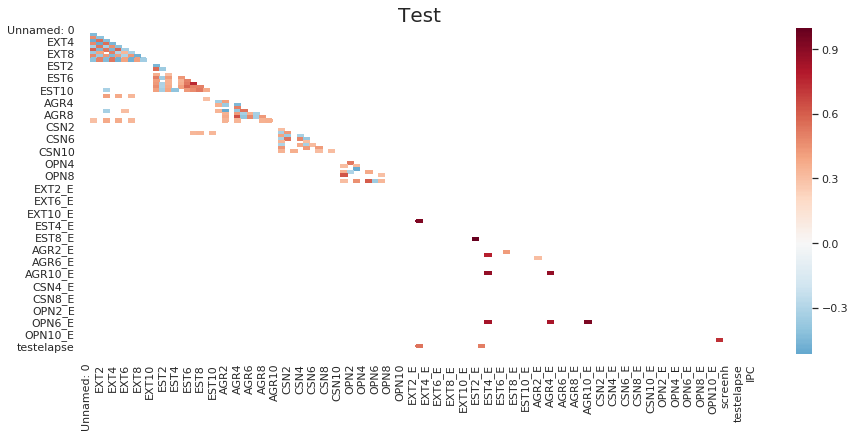

In [0]:
correlation_map(_test, 'Test', annot=False)

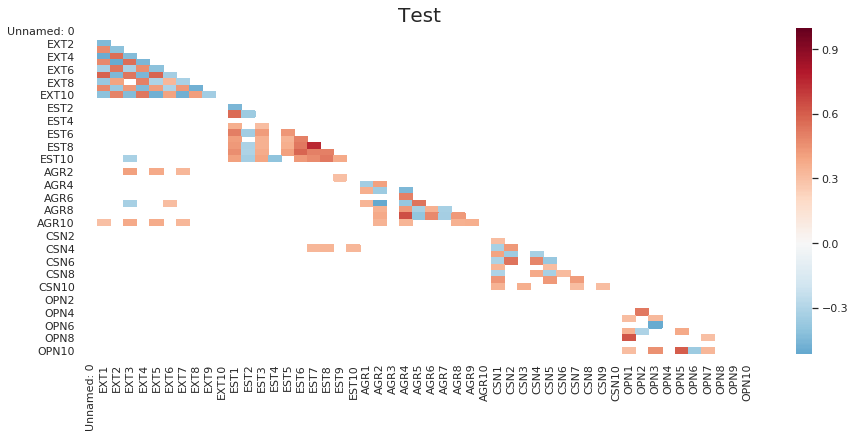

In [0]:
correlation_map(_test.loc[:,:'OPN10'], 'Test', annot=False)

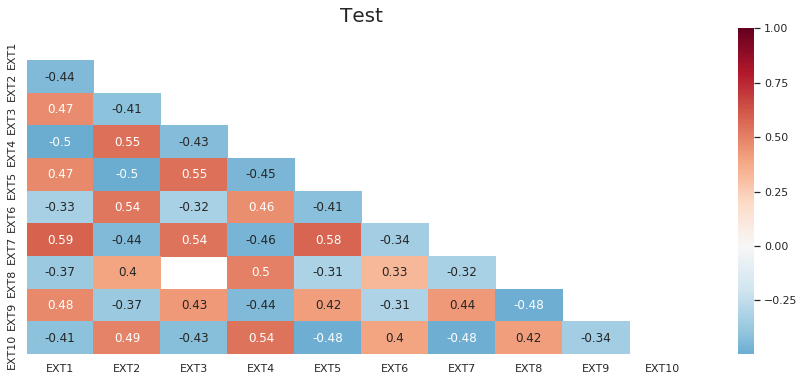

In [0]:
correlation_map(_test.loc[:,'EXT1':'EXT10'], 'Test')

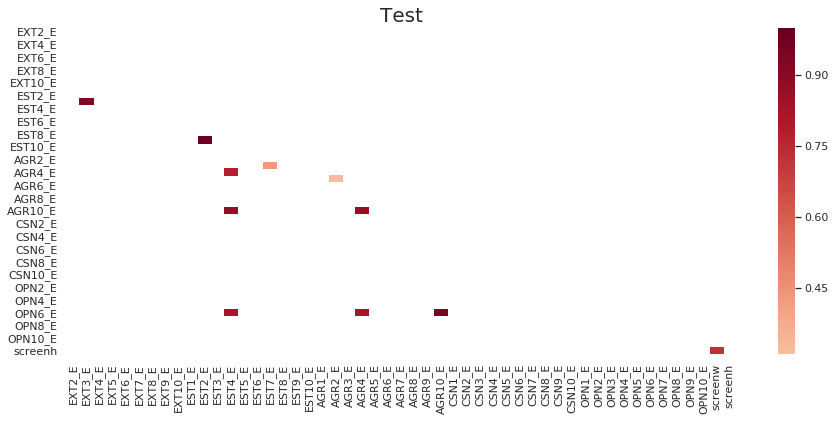

In [0]:
correlation_map(_test.loc[:,'EXT2_E':'screenh'], 'Test', annot=False)

### Observaciones y Comentarios

Podemos observar que son pocas las filas con valores nulos en alguna de las columnas, por lo que simplemente se eliminaron de la base de datos.
Se pueden identificar dos tipos de outliers. En las columnas de las respuestas al test hay muchos valores "0" que no son una alternativa del test. Estos son tratados como outliers y son reemplazados por un número que es elegido al azar entre las opciones válidas como respuestas al test. La probabilidad del azar es propocional a la cantidad de veces que cada categoría aparece en los datos de la columna. El segundo tipo de outliers se da en las columnas con el tiempo que la persona tardó en responder en donde aparecen tiempos muy alejados de la media. En este caso estos valores fueron reemplazados por la media de los datos truncados.
Se aprecia que existen pequeños grupos con una alta correlación entre sus datos. Puede apreciarse 5 conglomerados de correlaciones.

## Análisis Factorial

### 4) Verficación de Supuestos para el Análisis Factorial

Para la realización de un análisis factorial, se debe verificar que se cumplan ciertos supuestos sobre la data a analizar. En particular, ejecutar las pruebas de 1. Esfericidad de Barlett y 2. Kaiser-Meyer-Olkin. 

Investigue sobre las razones por las cuales se deben implementar estos test y explíquelo brevemente. Luego de ello, implemente los test y comente los resultados.


#### Esfericidad de Bartlett

In [0]:
_test.values

array([[355992, 4.0, 4.0, ..., 'US', '35.0527', '-78.8784'],
       [729472, 3.0, 2.0, ..., 'GB', '51.272', '0.5746'],
       [251646, 5.0, 1.0, ..., 'US', '39.4561', '-98.1062'],
       ...,
       [245102, 1.0, 2.0, ..., 'PA', '9.0', '-80.0'],
       [771310, 2.0, 1.0, ..., 'BE', '51.0667', '3.2667'],
       [566552, 1.0, 4.0, ..., 'CA', '45.3155', '-75.837']], dtype=object)

In [0]:
calculate_bartlett_sphericity(_test.loc[:,:'OPN10_E'])
# Cuando el segundo valor es menor a 0.5 indica que se puede aplicar el análisis
# factorial.

(749298.2661328925, 0.0)

#### Kaiser-Meyer-Olkin

In [0]:
kmo_all,kmo_model = calculate_kmo(_test.loc[:,:'OPN10_E'])
kmo_model

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.865216612023548

#### Explicación

La esfericidad de Bartlett sirve para asegurarse de que l matriz no sea una matriz identidad (es decir que cada columna no se correlacione solo consigomisma)

Kaiser-Meller-Olkin trata de saber si podemos factorizar las variables originales de forma eficiente

### 5) Ejecución Análisis Factorial

Para la generación del análisis factorial, se puede recurrir a la librería factor_analyzer.

Instancie un objeto con FactorAnalyzer(), donde se estimen 15 dimensiones latentes y no se aplique rotación.


In [0]:
fa = FactorAnalyzer(n_factors=15, rotation=None)
fa.fit(_test.loc[:,'EXT1':'OPN10'])
pd.DataFrame(fa.loadings_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.523284,0.195487,-0.341854,-0.016078,0.244704,0.100078,-0.040622,0.040968,0.000264,-0.028907,0.103759,-0.002131,-0.027732,-0.005503,0.062000
1,0.517449,-0.178214,0.409035,0.058489,-0.140976,0.207524,-0.038098,0.113744,0.016514,-0.015787,0.041651,-0.114655,0.097401,0.001653,0.175792
2,-0.669512,0.115029,-0.176647,-0.120885,0.104222,0.197610,0.013716,0.059243,-0.030249,0.096750,0.059112,0.041450,0.024140,-0.023765,0.047568
3,0.560279,-0.023108,0.436246,0.061853,-0.189944,0.211365,-0.012445,0.023711,0.029274,0.105947,0.026579,0.012905,-0.001590,-0.029041,0.036511
4,-0.632874,0.250369,-0.206640,-0.054594,0.193749,0.065888,0.020172,-0.008926,-0.004531,0.083194,0.070868,0.083787,-0.117792,0.015306,0.012513


### 6) Identificación y Gráficos de "Eigenvalues"

Investigue sobre el significado de “eigenvalues” en el contexto de un análisis Factorial. Luego, genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables. 

Para obtener los eigenvalues, puede usar “get_eigenvalues()” de factor_analyzer.


In [0]:
eigenvalues = pd.DataFrame(fa.get_eigenvalues())
eigenvalues

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,7.235585,4.927736,4.043644,3.466152,2.736591,2.043803,1.322982,1.025121,0.930526,0.899461,0.861047,0.828095,0.816435,0.791482,0.784444,0.748769,0.716624,0.697169,0.686466,0.651628,0.638683,0.628826,0.605782,0.591734,0.583897,0.567453,0.55338,0.533595,0.52329,0.515344,0.512527,0.486307,0.483363,0.455170,0.444290,0.439505,0.430818,0.424844,0.416651,0.410209,0.399162,0.387209,0.384177,0.379866,0.371159,0.358837,0.349245,0.340160,0.336698,0.234056
1,6.784768,4.490507,3.526430,3.027739,2.245526,1.546307,0.899172,0.610339,0.489151,0.418998,0.396456,0.359591,0.339849,0.307337,0.260701,0.181950,0.143363,0.133325,0.121749,0.095067,0.087867,0.074071,0.062208,0.044370,0.035010,0.022624,0.01789,0.014805,0.00736,0.004717,-0.006391,-0.009539,-0.018143,-0.020142,-0.026659,-0.029767,-0.033521,-0.040348,-0.041000,-0.050058,-0.053093,-0.054538,-0.059367,-0.065304,-0.074042,-0.079184,-0.081364,-0.090838,-0.099396,-0.113684


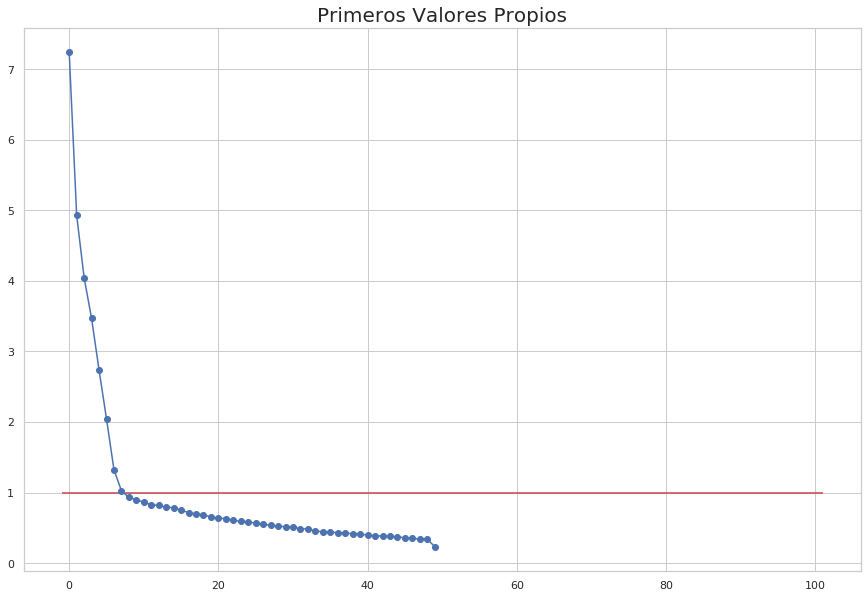

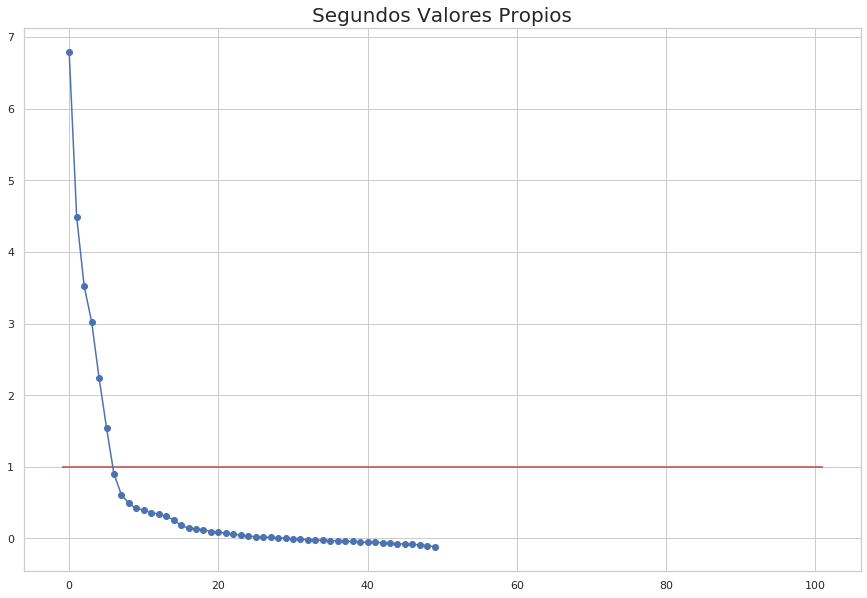

In [0]:
plt.figure(figsize=(15,10))
plt.plot(eigenvalues.iloc[0,:], '-o')
plt.hlines(y=1, xmin=-1, xmax=101, linewidth=2, color='r', alpha=0.8)
plt.title('Primeros Valores Propios', fontsize=20)
plt.show()

print()

plt.figure(figsize=(15,10))
plt.plot(eigenvalues.iloc[1,:], '-o')
plt.hlines(y=1, xmin=-1, xmax=101, linewidth=2, color='r', alpha=0.8)
plt.title('Segundos Valores Propios', fontsize=20)
plt.show()

### 7) Refactorización

Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

In [0]:
fa2 = FactorAnalyzer(n_factors=6, rotation=None)
fa2.fit(_test.loc[:,'EXT1':'OPN10'])

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation=None, rotation_kwargs={},
               use_smc=True)

### 8) Extracción de Cargas del Modelo

Extraiga las cargas del modelo e identifique qué ítems están asociados a cada factor. Puede utilizar “loadings_” de factor_analyzer para ello. 

Comente sobre qué significa cada factor construído, conceptualmente.


#### Extracción

In [0]:
charges = pd.DataFrame(fa2.loadings_).applymap(lambda x: np.where(abs(x) > 0.3, 
                                                                  round(x,2), 
                                                                  np.nan))
display(charges)

,0,1,2,3,4,5
0,-0.53,NaN,-0.34,NaN,NaN,NaN
1,0.52,NaN,0.40,NaN,NaN,NaN
2,-0.67,NaN,NaN,NaN,NaN,NaN
3,0.56,NaN,0.43,NaN,NaN,NaN
4,-0.64,NaN,NaN,NaN,NaN,NaN
5,0.52,NaN,NaN,NaN,NaN,NaN
6,-0.59,NaN,NaN,NaN,NaN,NaN
7,0.38,NaN,0.42,NaN,NaN,NaN
8,-0.47,NaN,-0.31,NaN,NaN,NaN
9,0.55,NaN,0.38,NaN,NaN,NaN


In [0]:
for i in charges.columns.values:
  print(f'GRUPO {i+1}:')
  print('Las características en inglés de este grupo son:', end='\n\n')
  columns_pos = _test.columns.values[charges[i][charges[i] > 0].index.values +1]
  columns_neg = _test.columns.values[charges[i][charges[i] < 0].index.values +1]
  for col_name in columns_pos:
    print('\t* ', col_info[col_name])
  for col_name in columns_neg:
    if 'am' in col_info[col_name]:
      print('\t*  I am NOT', col_info[col_name][5:])
    else:
      print('\t*  I NOT', col_info[col_name][2:])
  print('_'*75)

GRUPO 1:
Las características en inglés de este grupo son:

	*  I don't talk a lot.
	*  I keep in the background.
	*  I have little to say.
	*  I don't like to draw attention to myself.
	*  I am quiet around strangers.
	*  I get stressed out easily.
	*  I worry about things.
	*  I am easily disturbed.
	*  I get upset easily.
	*  I change my mood a lot.
	*  I have frequent mood swings.
	*  I get irritated easily.
	*  I often feel blue.
	*  I am not interested in other people's problems.
	*  I am not really interested in others.
	*  I make a mess of things.
	*  I shirk my duties.
	*  I am NOT the life of the party.
	*  I NOT feel comfortable around people.
	*  I NOT start conversations.
	*  I NOT talk to a lot of different people at parties.
	*  I NOT don't mind being the center of attention.
	*  I am NOT relaxed most of the time.
	*  I am NOT interested in people.
	*  I NOT take time out for others.
	*  I NOT make people feel at ease.
	*  I NOT have excellent ideas.
	*  I am NOT full of 

#### Comentario

Se lograron establecer 6 grupos de factores de la personalidad. Estos grupos se pueden relacionar con la teoría de los tipos de personalidad.

## Regresión

### 9) Regresión Lineal

En base a las los factores construidos, genere una regresión lineal, para analizar si alguno de los factores de personalidad influye en el tiempo de respuesta. 

Para lo anterior, requerirá de unir la columna que incluye el tiempo de respuesta, con los coeficientes generador por FactorAnalyzer, pudiendo utilizar “transform()” de factor_analyzer para obtener estos coeficientes.

De existir factores relevantes, indique cual es el que repercute más en la regresión.


In [0]:
transformed = pd.DataFrame(fa2.transform(_test.loc[:,'EXT1':'OPN10']))
transformed

,0,1,2,3,4,5
0,0.152329,0.818541,-0.380086,0.875672,1.580742,1.165633
1,-0.462795,0.000734,-1.602229,-0.054423,-0.616644,0.566003
2,-2.019097,0.262158,-1.277052,0.419010,-0.557547,1.598899
3,0.243885,-2.130636,1.287730,2.216523,0.801621,-0.734133
4,0.191936,1.379082,-0.386431,0.148967,-0.850905,-0.061780
...,...,...,...,...,...,...
24910,-0.479954,-0.659659,0.105749,-0.121264,-0.424218,-0.399377
24911,-0.123651,-0.661393,-0.808357,0.184537,0.710980,0.622304
24912,0.533008,0.910883,1.187320,0.315539,1.066941,-1.760336
24913,-0.377850,0.125464,0.211615,-1.312083,-0.077752,-0.217464


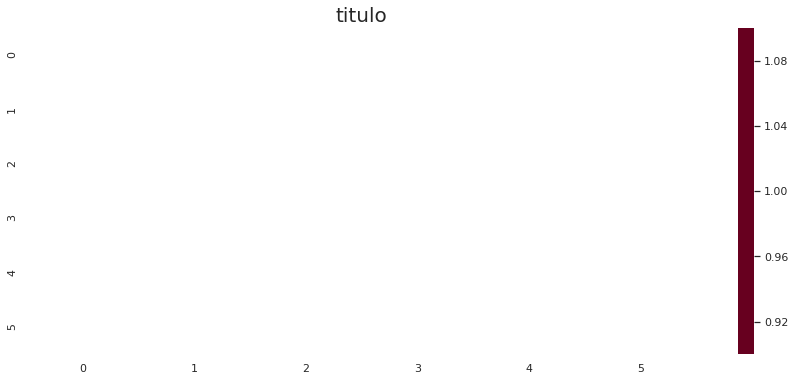

In [0]:
correlation_map(transformed, 'titulo')

In [0]:
x = transformed.drop('mean_time', inplace=False, axis=1)
y = transformed['mean_time']
X = smf.add_constant(x)
est = smf.OLS(y, x).fit()
print(est.summary())

KeyError: ignored

## Bonus

### 10) Proponga otra regresión lineal o análisis factorial que sea relevante para efectos de la encuesta. ¿Qué puede concluir de aquel análisis?


In [0]:
times = pd.DataFrame()

# Se recorren las columnas de la tabla de las cargas:
for i in charges.columns.values:
  # Se toman los nombres de las columnas de la tabla del test en base a
  # las cargas con más de 0.3 o menos de -0.3
  columns = _test.columns.values[charges[i][abs(charges[i]) > 0].index.values +1] # Se suma 1 por la columna Unnamed 0

  times[f't_prom_grupo_{i+1}'] = _test[columns + '_E'].mean(axis='columns')


In [0]:
times['testelapse'] = _test['testelapse']

In [0]:
correlation_map(times, 'Correlación Tiempos')

In [0]:
x = times[['t_prom_grupo_1', 't_prom_grupo_2']]
y = times['testelapse']
X = smf.add_constant(x)
est = smf.OLS(y, x).fit()
print(est.summary())

In [0]:
sns.lmplot(x="t_prom_grupo_1", y="testelapse", data=times, markers='.')
plt.title('Correlación Lineal de Tiempo Grupo 1 y Tiempo Total en el Test', fontsize=20)
# save_graph(modify_text('1Correlación Lineal de Tiempo Grupo 1 y Tiempo Total en el Test'))

In [0]:
sns.lmplot(x="t_prom_grupo_2", y="testelapse", data=times, markers='.')
plt.title('Correlación Lineal de Tiempo Grupo 1 y Tiempo Total en el Test', fontsize=20)

E. Formato de entrega:
Notebook formato informe. Esto quiere decir:
Ordenado por preguntas. 
Que corra de principio a fin. Si este presenta error, se corregirá hasta antes del error.
Código bien documentado. Esto hace referencia a que deben contestar las preguntas en el notebook. Además, incluir sus conclusiones si la pregunta así lo requiere.
Diapositivas de presentación (formato pdf). 


F. Plazos de entrega:
Entregar notebook y diapositivas Jueves 28/11/2019 hasta las 23:59 hrs.
Presentación Viernes 29/11/2019 desde las 09:00 hrs.
